# GROUP 3 - PROJECT 2 - Breast Cancer
**Team mates: Mahesh M. Nair (mmn9), Jigyasa Kohli (jk423)**

**PROJECT DESCRIPTION**
The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself: 

- Data set used: Breast Cancer Dataset Data set 
- No. of Attributes: 10 No. of Instances: 699
- Classification tools to be used: Neural Network, Decision Tree and SVM


Dataset repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)
**Attribute Analysis**



In [6]:
import pandas as pa
import pandas.tools.plotting
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import style
from sklearn.cross_validation import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
%matplotlib inline
def read_data(file_path):
    data = pa.io.parsers.read_csv(file_path,header = 0)
    return data
h = .02  # step size in the mesh

#Original datasets
training_data = read_data('MGMT635_IP_BreastCancerData (2).csv')
testing_data = read_data('testing.csv')



#sns.pairplot(occ_ttrain, x_vars=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell','Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitosis'], y_vars=['1 denotes breast cancer or not'], size=10, aspect=0.7, kind='reg')


#breast_train = breast_train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell','Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitosis','1 denotes breast cancer or not']]

classifiers = [SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5)]
names = ["RBF SVM","Decision Tree"]
x = training_data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitosis']]
y = training_data[['Class']]

#occ_uncon.head()
training_data.head()



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


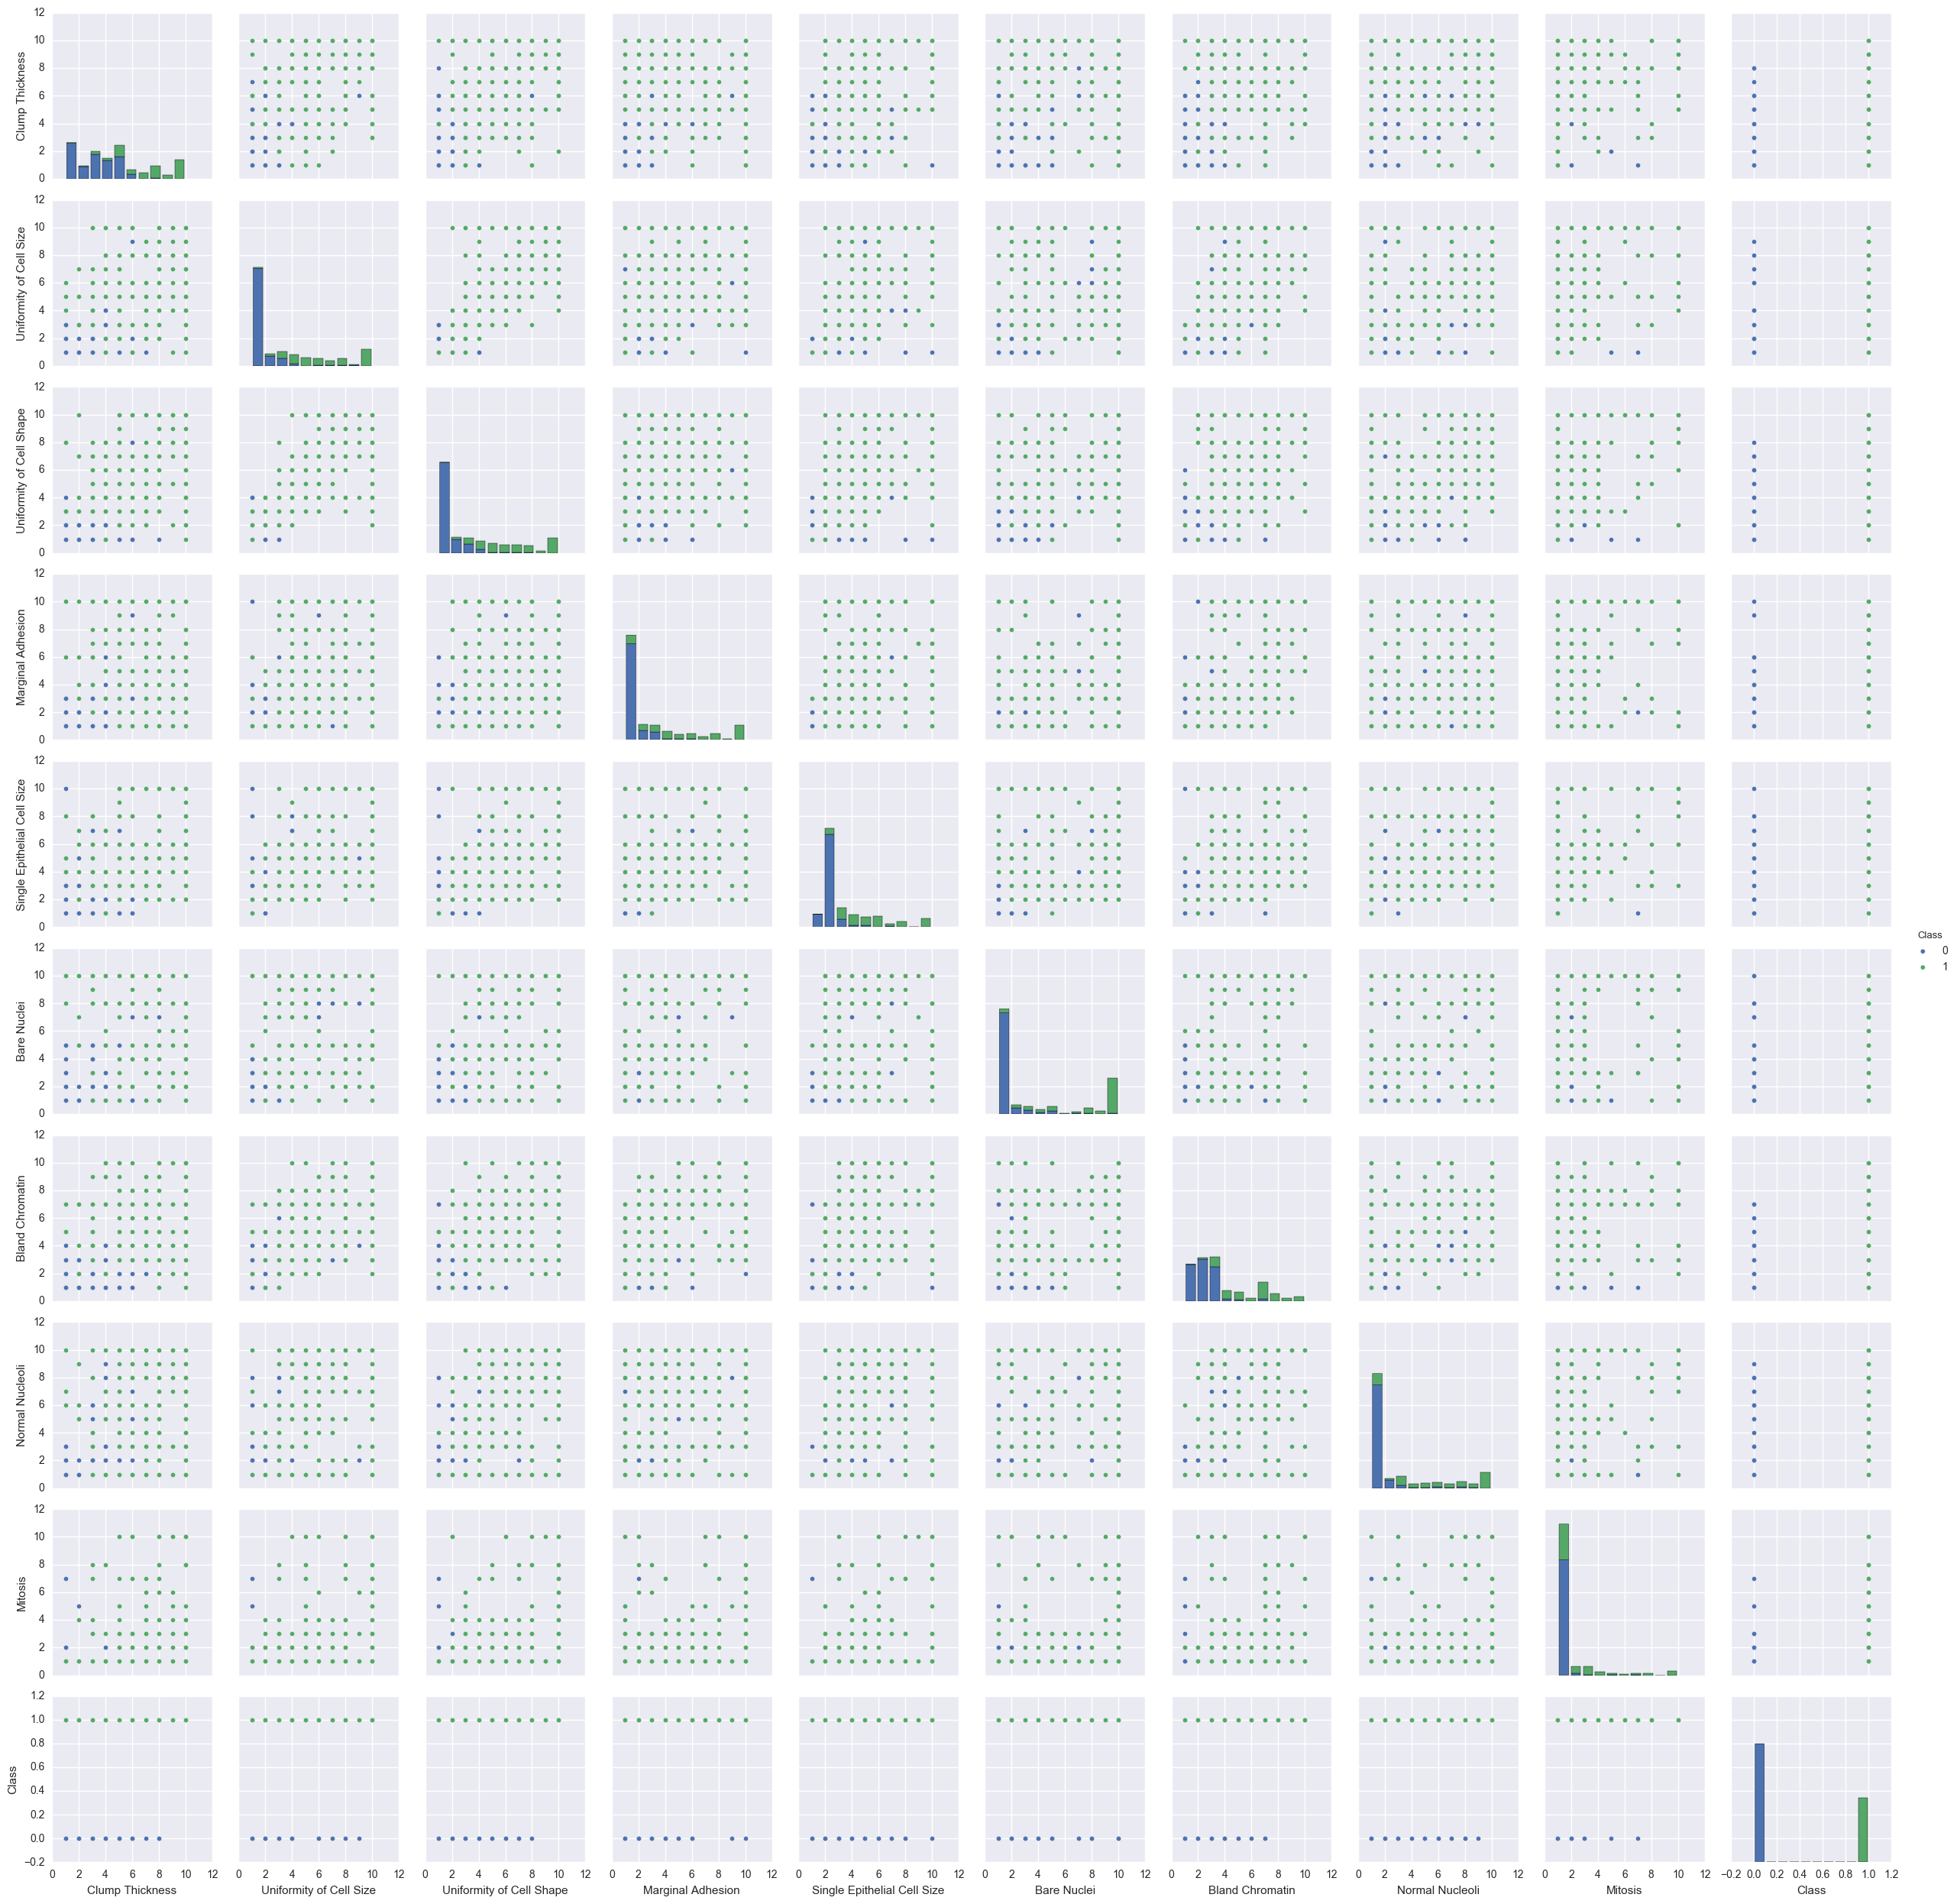

In [7]:
sns.pairplot(training_data, hue='Class')

In [8]:
training_data.shape

(659, 10)

In [9]:
testing_data.shape


(40, 10)

### SVM

In [37]:

#x = training_data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Mitosis']]
x = training_data[['Clump Thickness','Uniformity of Cell Size']]

x=np.array(x)
x=x.tolist()
y=np.array(y)
y=y.ravel()
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=42)

clfs=SVC(kernel='rbf',gamma=2, C=1)
clfs.fit(x_train, y_train)

y_pred=clfs.predict(x_test)
zxc=accuracy_score(y_test,y_pred)
print('Accuracy of SVM Classifier', zxc)


Accuracy of SVM Classifier 0.969696969697


In [38]:
x.shape[1]

2

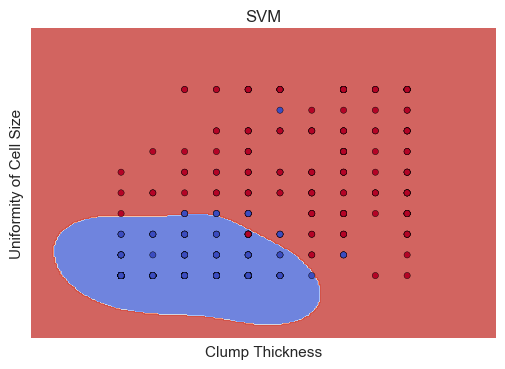

In [39]:
# create a mesh to plot in


x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clfs.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM')

plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier
# Neural Network - MLP classifier

x = training_data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Mitosis']]
y = training_data[['Class']]

x=np.array(x)
y=np.array(y)
y=y.ravel()

x=x.tolist()
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10,7,10))
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_test)

cnf_matrix =confusion_matrix(y_test,predictions)
print ("Accuracy of MLP Neural network",accuracy_score(y_test,predictions))
print ("")
print(classification_report(y_test,predictions))

Accuracy of MLP Neural network 0.969696969697

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        42
          1       0.96      0.96      0.96        24

avg / total       0.97      0.97      0.97        66



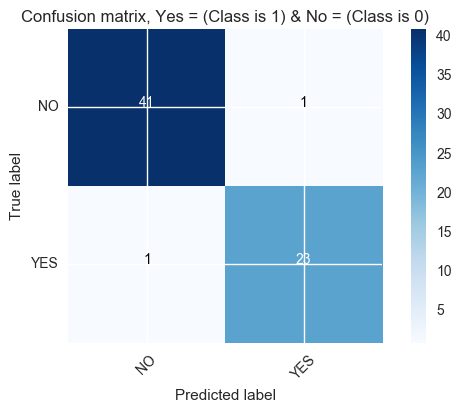

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #print('Confusion matrix')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Class is 1) & No = (Class is 0)')
plt.show()

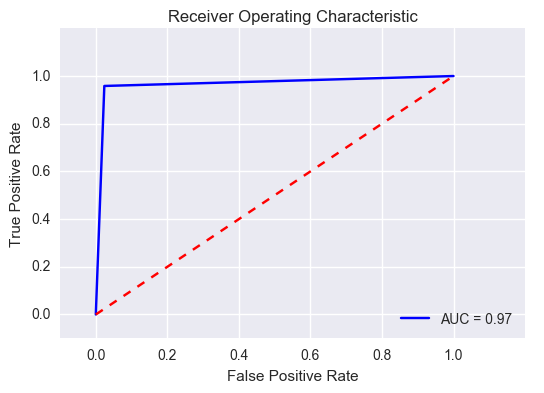

In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
x = training_data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Mitosis']]
y = training_data[['Class']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=42)

decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(x_train, y_train)

predictions=decisionTree.predict(x_test)
print ("Accuracy of Decision Tree",accuracy_score(y_test,predictions))

Accuracy of Decision Tree 0.954545454545


In [47]:
print (decisionTree.feature_importances_)


[ 0.06847879  0.85520143  0.07226572  0.00405406  0.        ]


In [53]:
with open("tree.dot", "w") as output_file:
    export_graphviz(decisionTree, feature_names=x.columns, out_file=output_file)

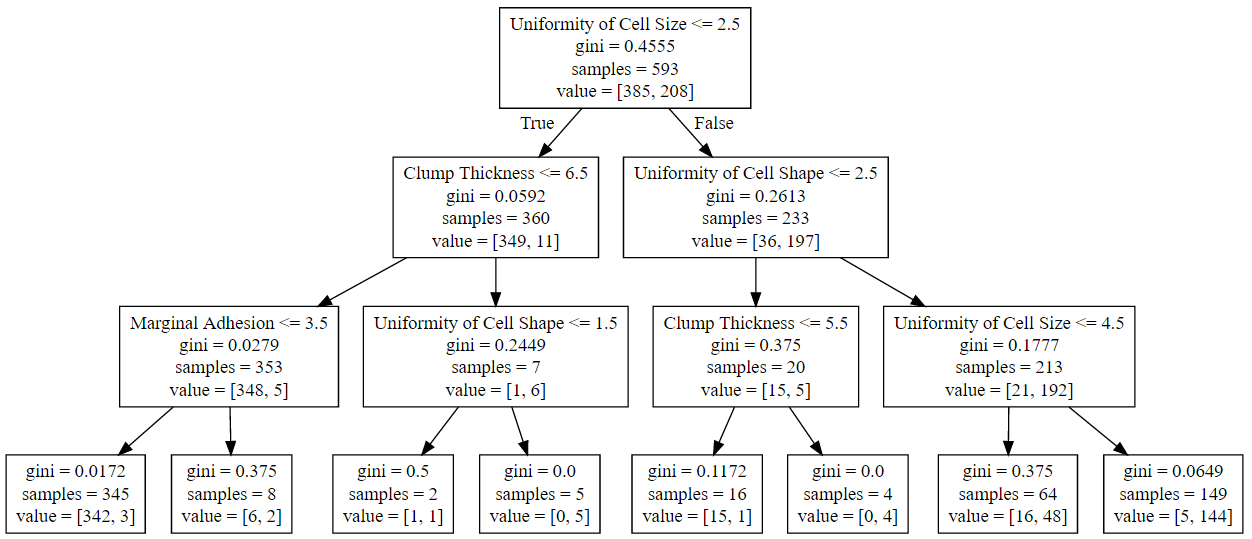

In [54]:
from IPython.core.display import Image 
Image(filename='tree.png')